In [1]:
import os
import warnings
import sys

import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")
PROJ_ROOT_PATH = os.path.dirname(os.getcwd())
sys.path.append(PROJ_ROOT_PATH)
DATA_PATH = os.path.join(PROJ_ROOT_PATH, "datasets")

In [2]:
from methods.clusterization.kmeans import get_kmeans_clusters, elbow_method, silhouette_method
from src.plotting.plot_time_series import plot_timeseries, plot_timeseries_clusters, plot_avg_timeseries_clusters
from src.plotting.plot_time_series import plot_2d_clasters, plot_3d_clasters
from src.normalization.scaling import scale_data
from methods.pca_approximation.PCA import get_pca_approximation

from methods.clusterization.kmean_tslearn import *
from tslearn.clustering import TimeSeriesKMeans, silhouette_score

*В данном блокноте рассмотрены примеры применения алгоритма kMean для кластеризации времнных рядов*

In [3]:
data = pd.read_csv(os.path.join(DATA_PATH, "Synthesised Time Series", "synthesised.csv"), index_col="id")
data.head()

approximation ={}
approximation["all"] = data
approximation["10p"] = pd.read_csv(os.path.join(DATA_PATH, "Synthesised Time Series", "synthesised_10points.csv"))
approximation["20p"] = pd.read_csv(os.path.join(DATA_PATH, "Synthesised Time Series", "synthesised_20points.csv"))
approximation["50p"] = pd.read_csv(os.path.join(DATA_PATH, "Synthesised Time Series", "synthesised_50points.csv"))
approximation["100p"] = pd.read_csv(os.path.join(DATA_PATH, "Synthesised Time Series", "synthesised_100points.csv"))

In [22]:
training_size = 300

# PLA, KMean

Протестируем метод kmean на полученных приближених. Для оценки метода будем использовать метод локтя и коэфициент силуэта

In [7]:
num_clusters = 10
elbow_data = {}
silhouette_data = {}

for key, value in approximation.items():
    elbow_data[key] = elbow_method(value[:training_size], num_clusters)
    silhouette_data[key] = silhouette_method(value[:training_size], num_clusters)
    print(f"Max silhouette score for {key} approximation: {max(silhouette_data[key])}")

Max silhouette score for all approximation: 0.38363072559809425
Max silhouette score for 10p approximation: 0.4204150220394351
Max silhouette score for 20p approximation: 0.3980150346527676
Max silhouette score for 50p approximation: 0.3856540322664088
Max silhouette score for 100p approximation: 0.3874709426038021


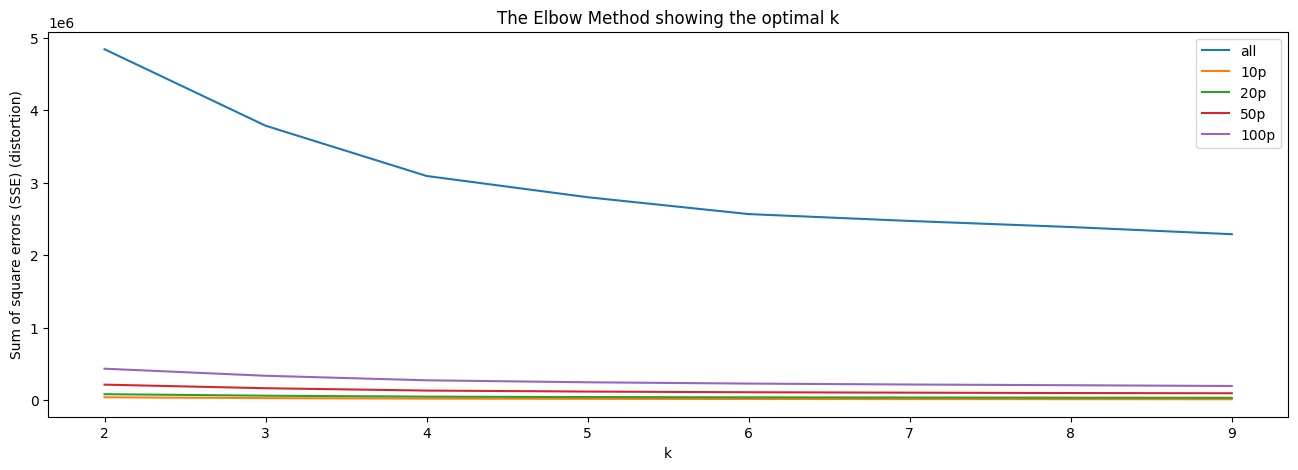

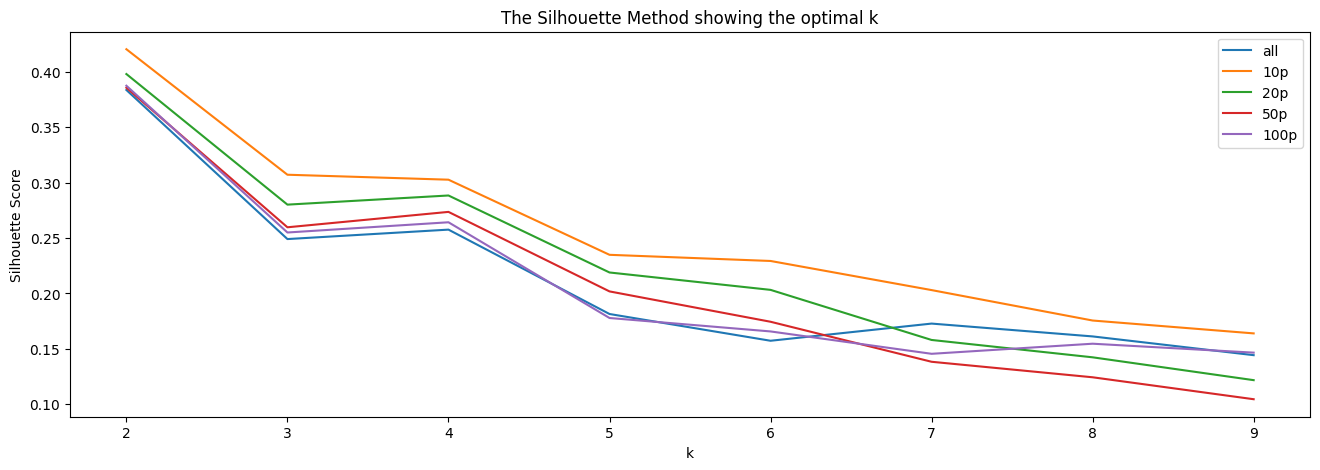

In [8]:
plt.figure(figsize=(16,5))
for key, value in elbow_data.items():
    plt.plot(range(2, num_clusters), value, '-', label=key)
plt.xlabel('k')
plt.ylabel('Sum of square errors (SSE) (distortion)')
plt.title('The Elbow Method showing the optimal k')
plt.legend()

plt.figure(figsize=(16,5))
for key, value in silhouette_data.items():
    plt.plot(range(2, num_clusters), value, '-', label=key)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method showing the optimal k')
plt.legend()
plt.show()

Будем разделять графики на 2 кластера используя их приближение в 10 точек

In [18]:
clusters = get_kmeans_clusters(approximation["10p"][:training_size], num_clusters=2)

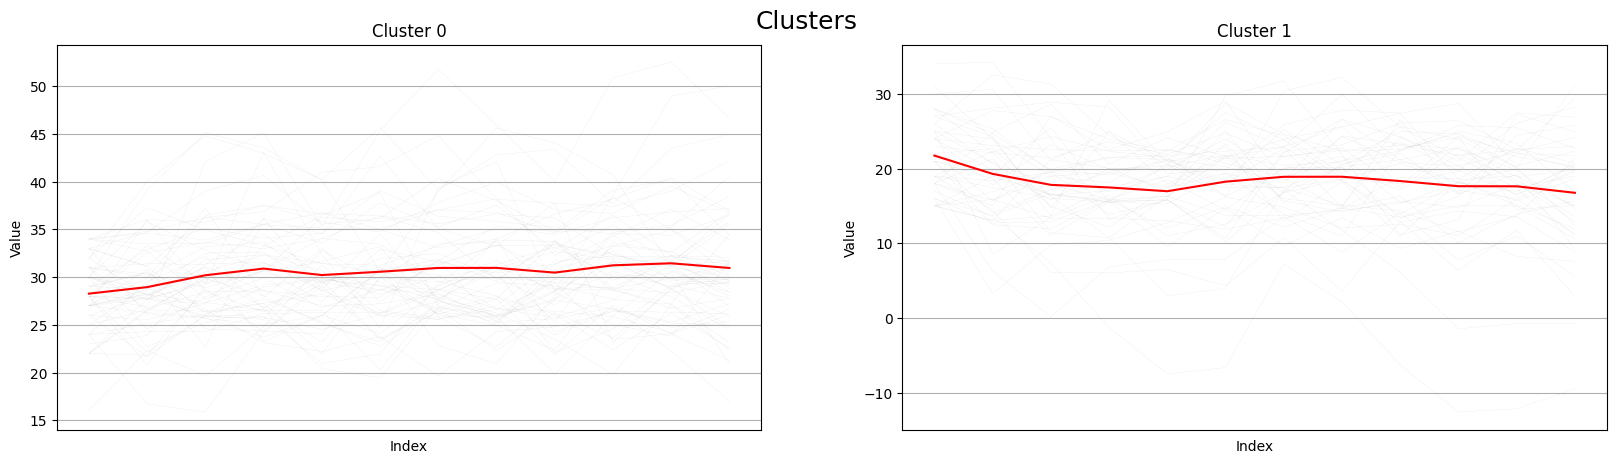

In [19]:
plot_avg_timeseries_clusters(approximation["10p"][:training_size].assign(cluster=clusters),num_saples=1000, num_clusters=2)

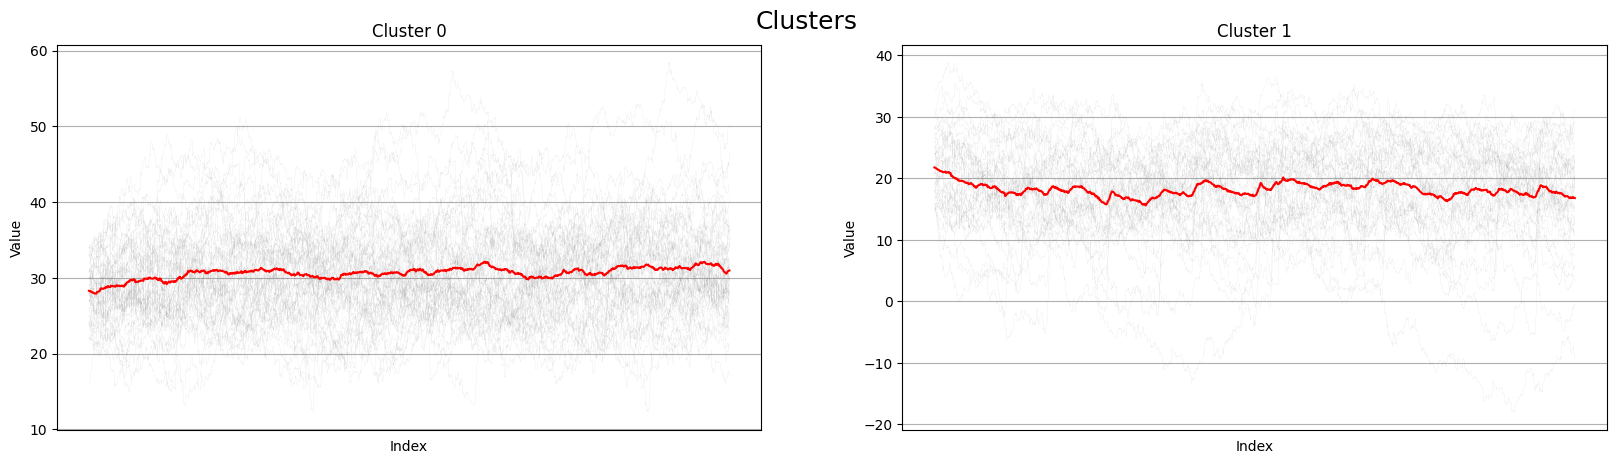

In [20]:
plot_avg_timeseries_clusters(approximation["all"][:training_size].assign(cluster=clusters),num_saples=1000, num_clusters=2)

Тут видно что временные ряды группируются больше по принципу диапазона а не динамики поэтому отскалируем данные

In [6]:
scaled_approximation = {}

for key, value in approximation.items():
    scaled_approximation[key] = scale_data(value)

In [24]:
elbow_data = {}
silhouette_data = {}

for key, value in scaled_approximation.items():
    elbow_data[key] = elbow_method(value[:training_size], num_clusters)
    silhouette_data[key] = silhouette_method(value[:training_size], num_clusters)
    print(f"Max silhouette score for {key} approximation: {max(silhouette_data[key])}")

Max silhouette score for all approximation: 0.09132035660702938
Max silhouette score for 10p approximation: 0.16173738029315005
Max silhouette score for 20p approximation: 0.11181331381690496
Max silhouette score for 50p approximation: 0.09946273014280971
Max silhouette score for 100p approximation: 0.08587997211974566


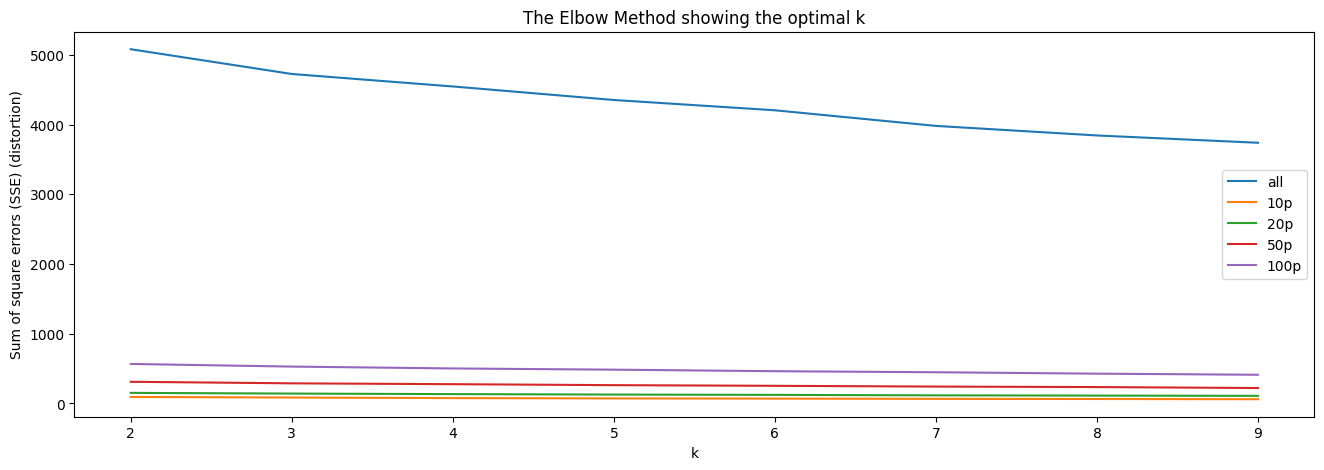

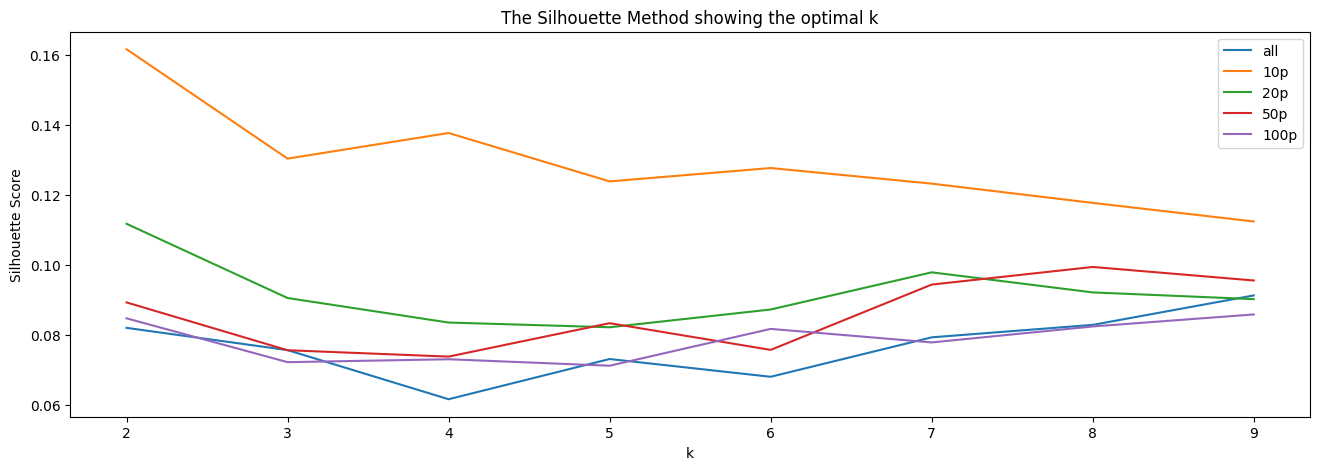

In [25]:
plt.figure(figsize=(16,5))
for key, value in elbow_data.items():
    plt.plot(range(2, num_clusters), value, '-', label=key)
plt.xlabel('k')
plt.ylabel('Sum of square errors (SSE) (distortion)')
plt.title('The Elbow Method showing the optimal k')
plt.legend()

plt.figure(figsize=(16,5))
for key, value in silhouette_data.items():
    plt.plot(range(2, num_clusters), value, '-', label=key)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method showing the optimal k')
plt.legend()
plt.show()

In [31]:
clusters = get_kmeans_clusters(scaled_approximation["10p"][:training_size], num_clusters=2)

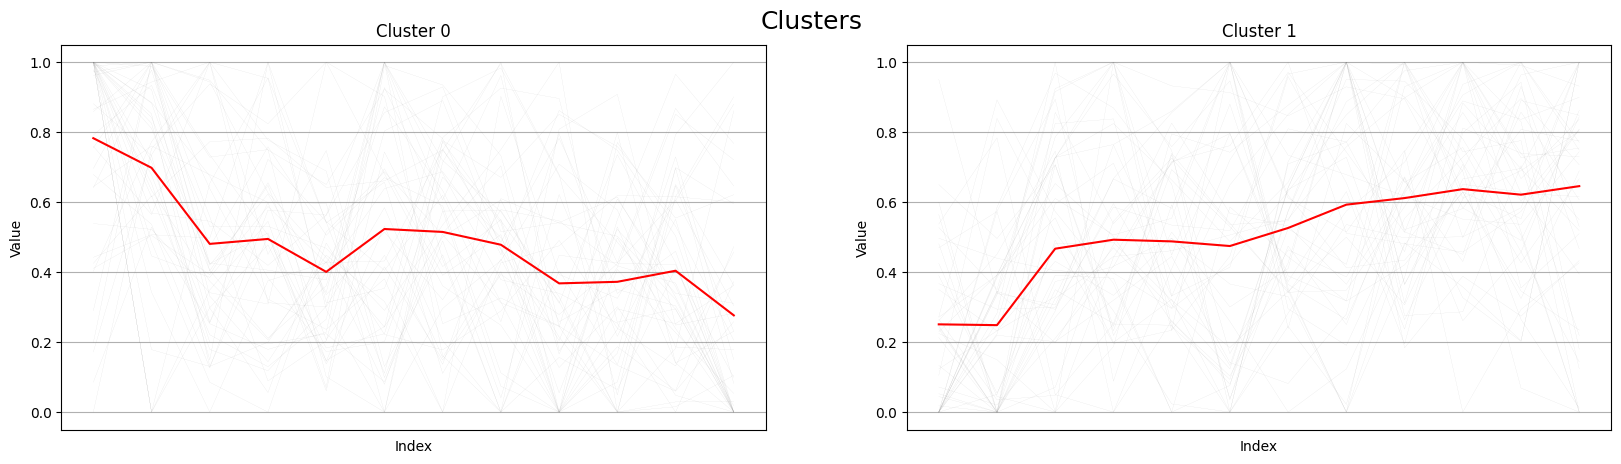

In [32]:
plot_avg_timeseries_clusters(scaled_approximation["10p"][:training_size].assign(cluster=clusters),num_saples=1000, num_clusters=2)

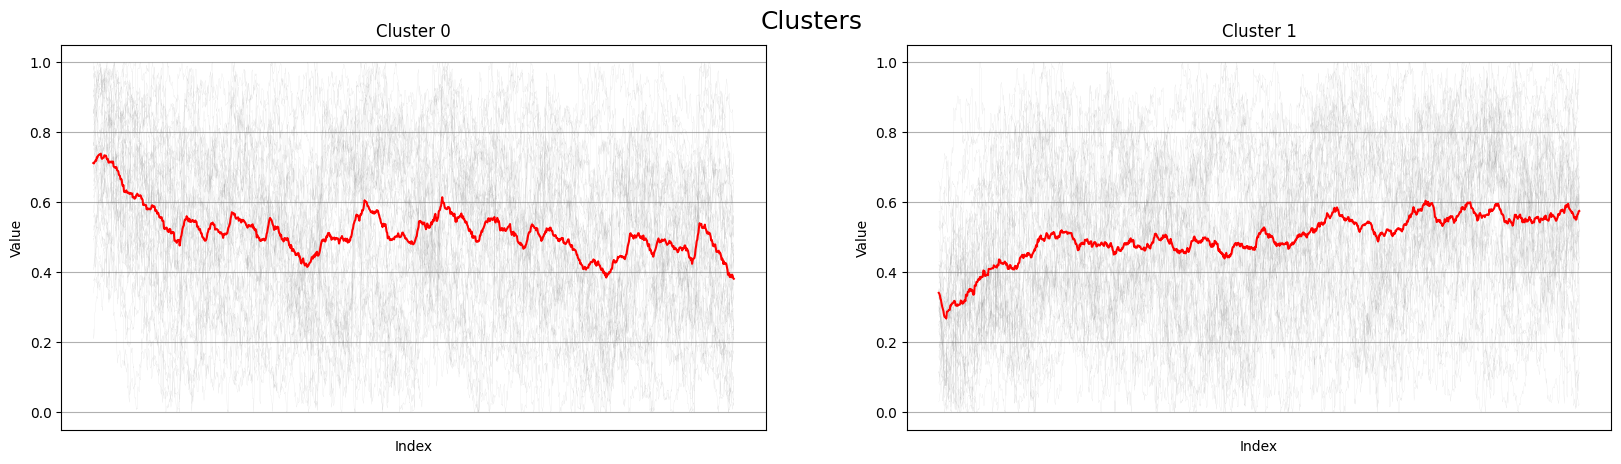

In [33]:
plot_avg_timeseries_clusters(scaled_approximation["all"][:training_size].assign(cluster=clusters),num_saples=1000, num_clusters=2)

Также рассмотрим гипотезу озвученную здесь https://www.kaggle.com/code/izzettunc/introduction-to-time-series-clustering/notebook
что количество кластеров стоит вычислять как корень квадратный из количества временных рядов 

In [34]:
clusters = get_kmeans_clusters(scaled_approximation["10p"][:training_size], num_clusters=10)

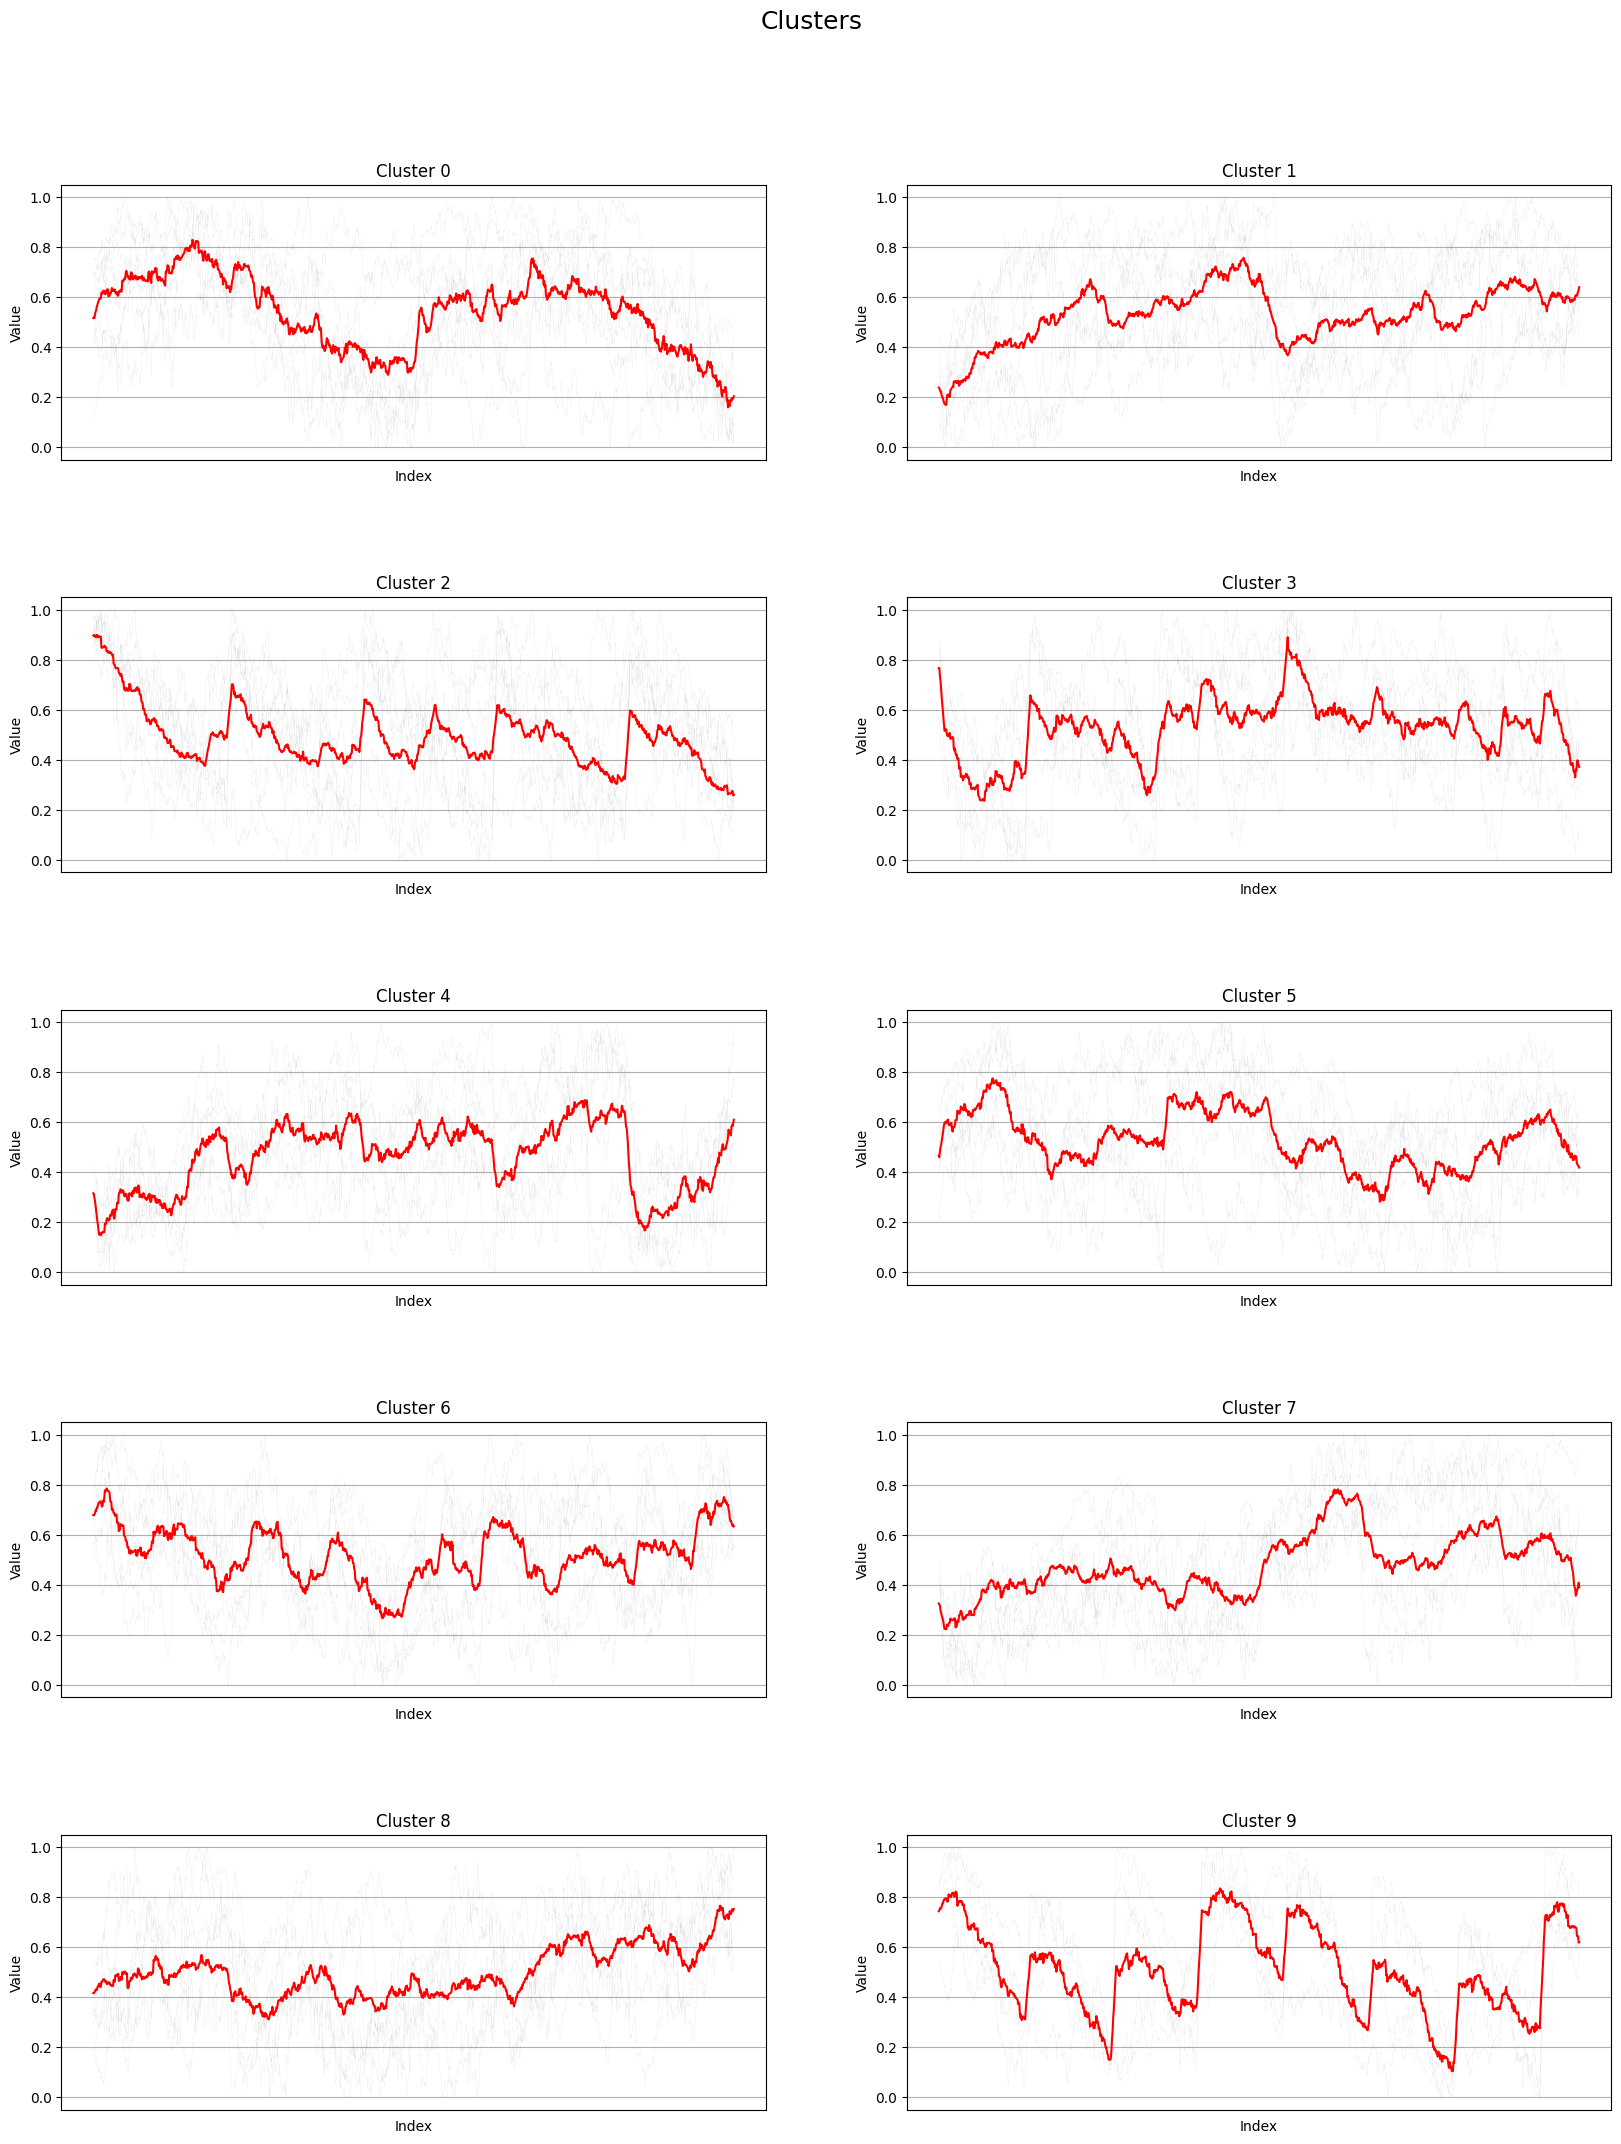

In [35]:
plot_avg_timeseries_clusters(scaled_approximation["all"][:training_size].assign(cluster=clusters),num_saples=1000, num_clusters=10)

# PCA, KMean

In [12]:
pca_approximation = {}

for key, value in scaled_approximation.items():
    pca_approximation[key] = get_pca_approximation(value, num_components=3)

In [47]:
training_size = 500
num_clusters = 11
elbow_data = {}
silhouette_data = {}

for key, value in pca_approximation.items():
    elbow_data[key] = elbow_method(value[:training_size], num_clusters)
    silhouette_data[key] = silhouette_method(value[:training_size], num_clusters)
    print(f"Max silhouette score for {key} approximation: {max(silhouette_data[key])}")

Max silhouette score for all approximation: 0.24706391407103034
Max silhouette score for 10p approximation: 0.29669133977433443
Max silhouette score for 20p approximation: 0.27628046828244474
Max silhouette score for 50p approximation: 0.26098827861896456
Max silhouette score for 100p approximation: 0.25191740618817515


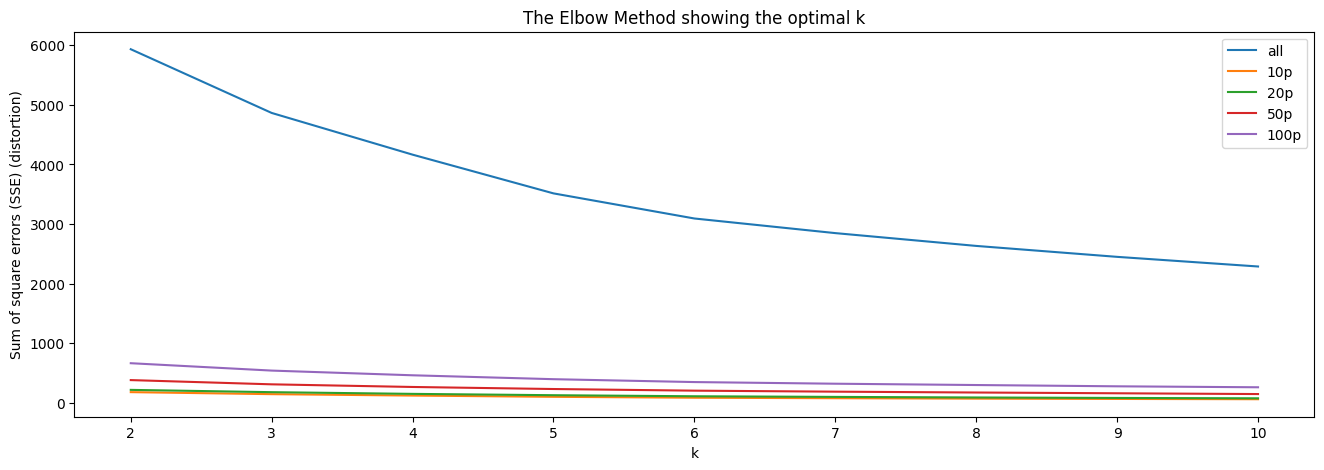

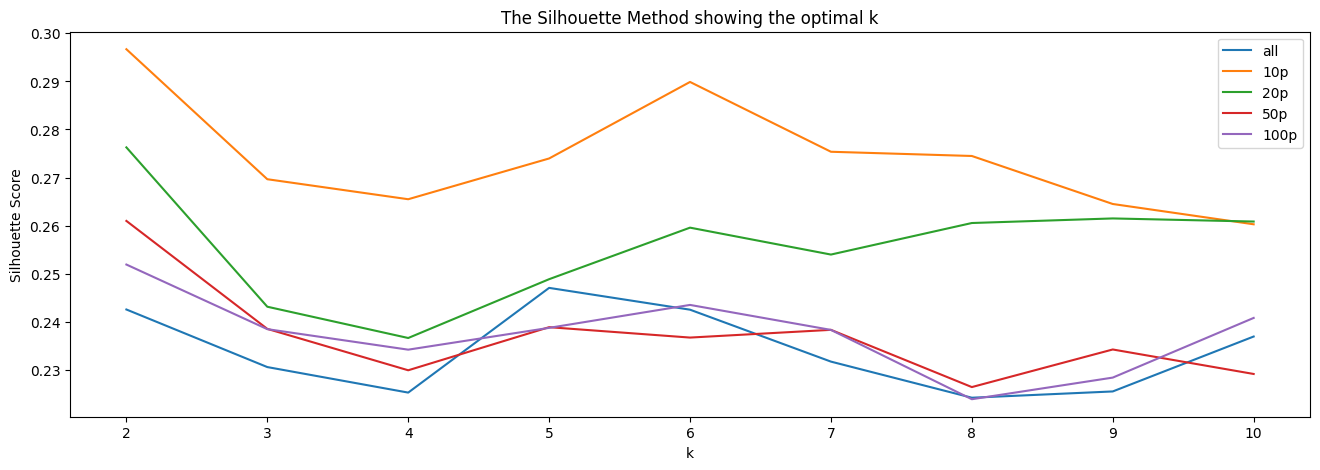

In [48]:
plt.figure(figsize=(16,5))
for key, value in elbow_data.items():
    plt.plot(range(2, num_clusters), value, '-', label=key)
plt.xlabel('k')
plt.ylabel('Sum of square errors (SSE) (distortion)')
plt.title('The Elbow Method showing the optimal k')
plt.legend()

plt.figure(figsize=(16,5))
for key, value in silhouette_data.items():
    plt.plot(range(2, num_clusters), value, '-', label=key)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method showing the optimal k')
plt.legend()
plt.show()

In [49]:
clusters = get_kmeans_clusters(pca_approximation["10p"][:training_size], num_clusters=2)

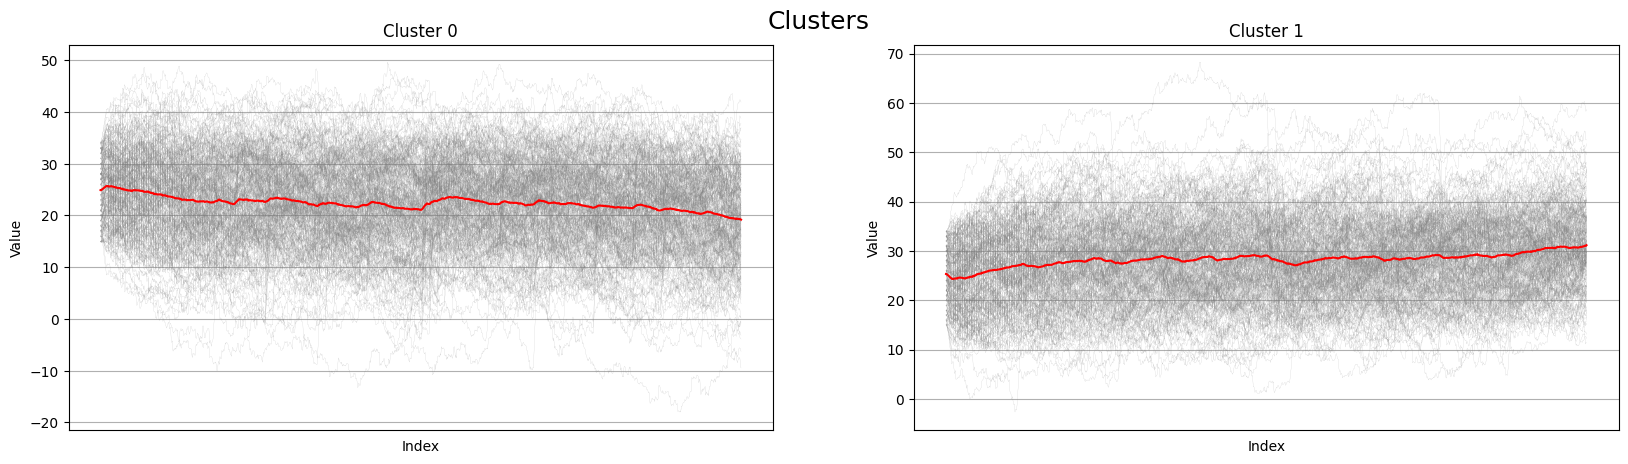

In [50]:
plot_avg_timeseries_clusters(approximation["all"][:training_size].assign(cluster=clusters),num_saples=1000, num_clusters=2)

In [51]:
plot_3d_clasters(pca_approximation["all"][:training_size], clusters)

Также попробуем разделить 6 кластеров

In [54]:
clusters = get_kmeans_clusters(pca_approximation["10p"][:training_size], num_clusters=6)

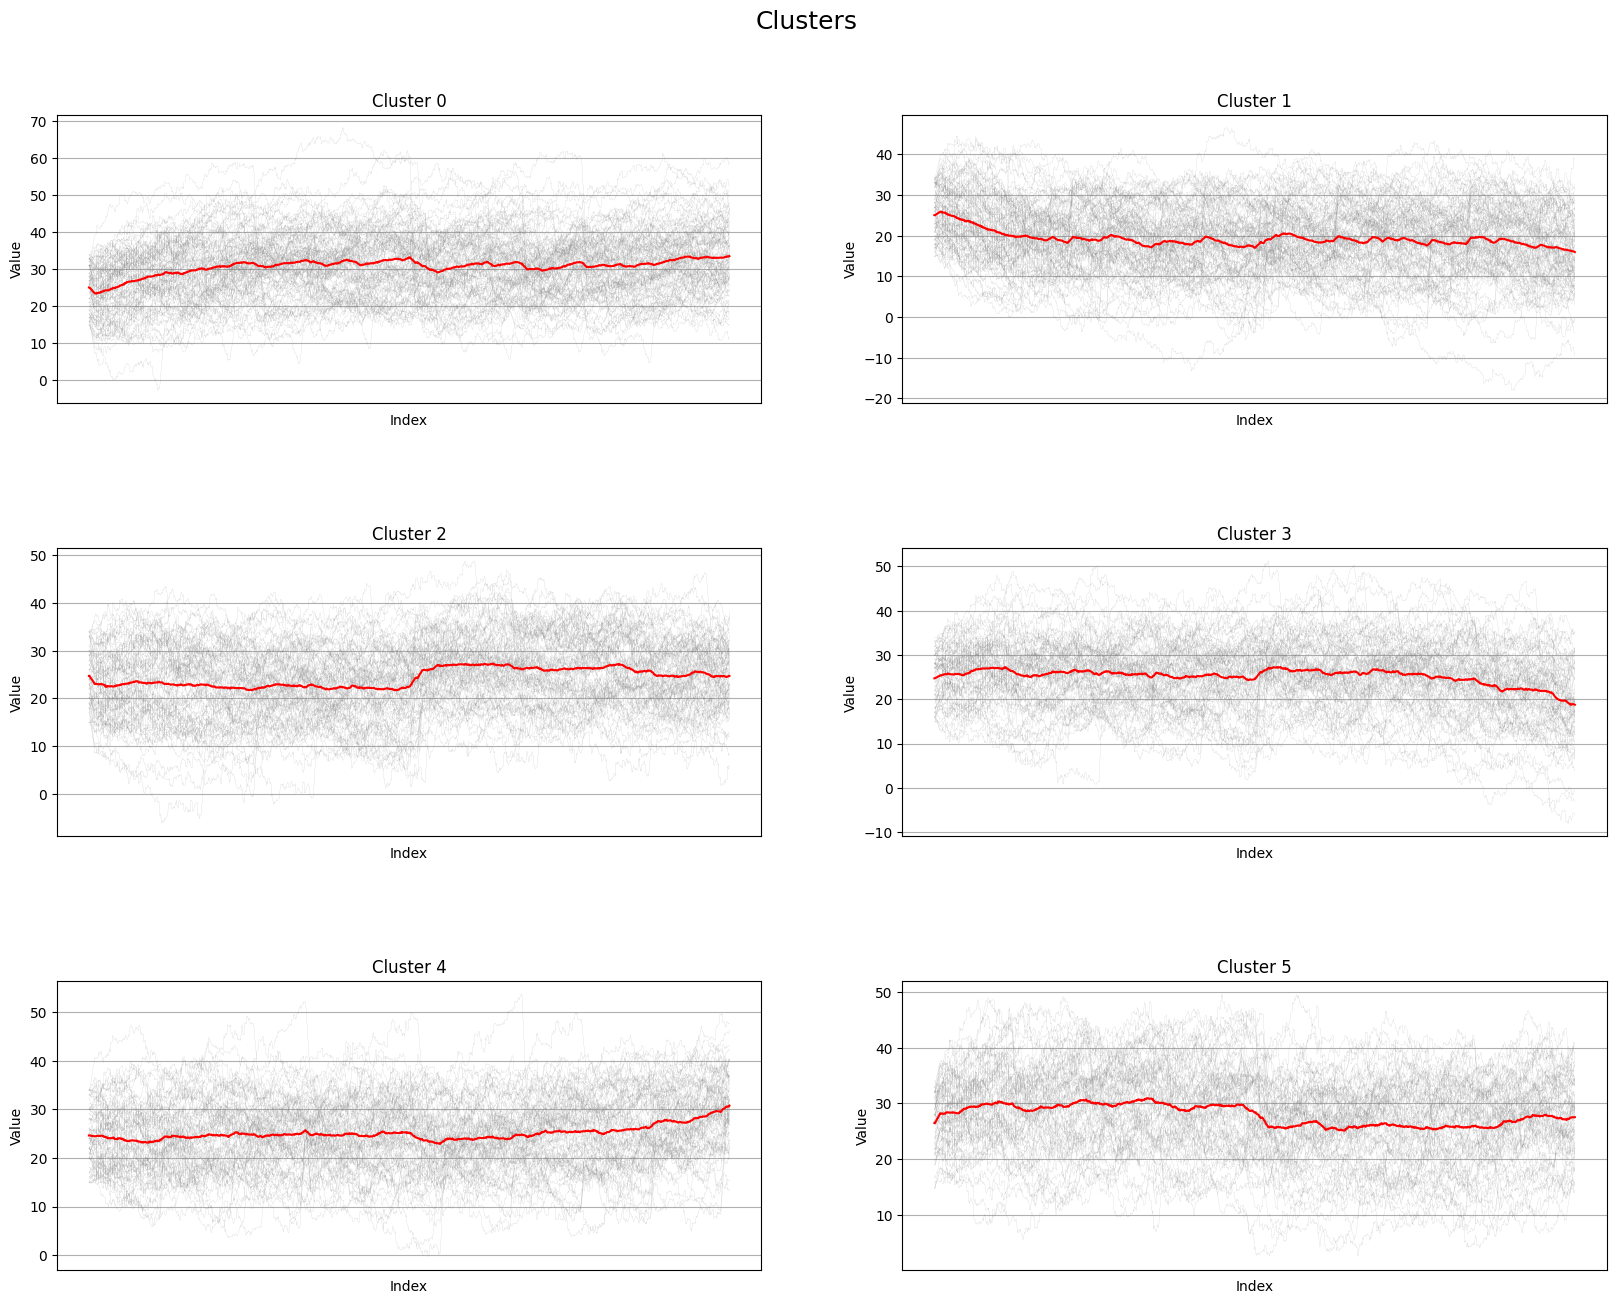

In [55]:
plot_avg_timeseries_clusters(approximation["all"][:training_size].assign(cluster=clusters),num_saples=1000, num_clusters=6)

In [56]:
plot_3d_clasters(pca_approximation["all"][:training_size], clusters)

# DTW, KMean

In [31]:
from src.plotting.plot_time_series import plot_timeseries, plot_timeseries_clusters

In [39]:
training_size = 100
num_clusters = 11
elbow_data = {}
silhouette_data = {}
elbow_data["20p"] = []
silhouette_data["20p"] = []

time_series_data = to_time_series_dataset(scaled_approximation["20p"][:training_size].values)
for k in range(2, num_clusters):
    kmean = TimeSeriesKMeans(n_clusters=k,metric="dtw", n_jobs=-1, random_state=42)
    labels = kmean.fit_predict(time_series_data)
    elbow_data["20p"].append(kmean.inertia_)
    silhouette_data["20p"].append(silhouette_score(time_series_data, labels, n_jobs=-1, metric="dtw"))

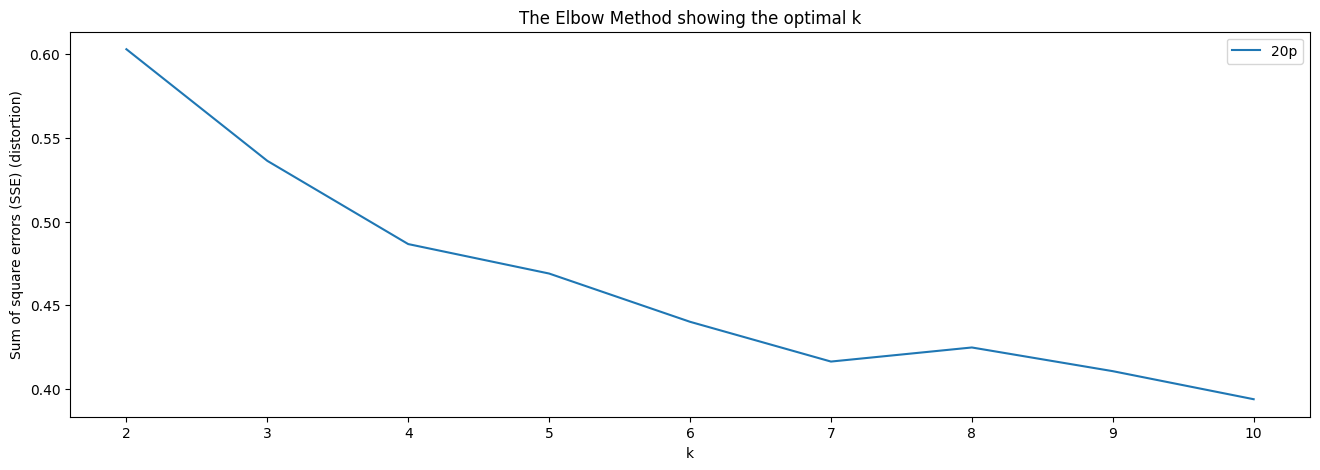

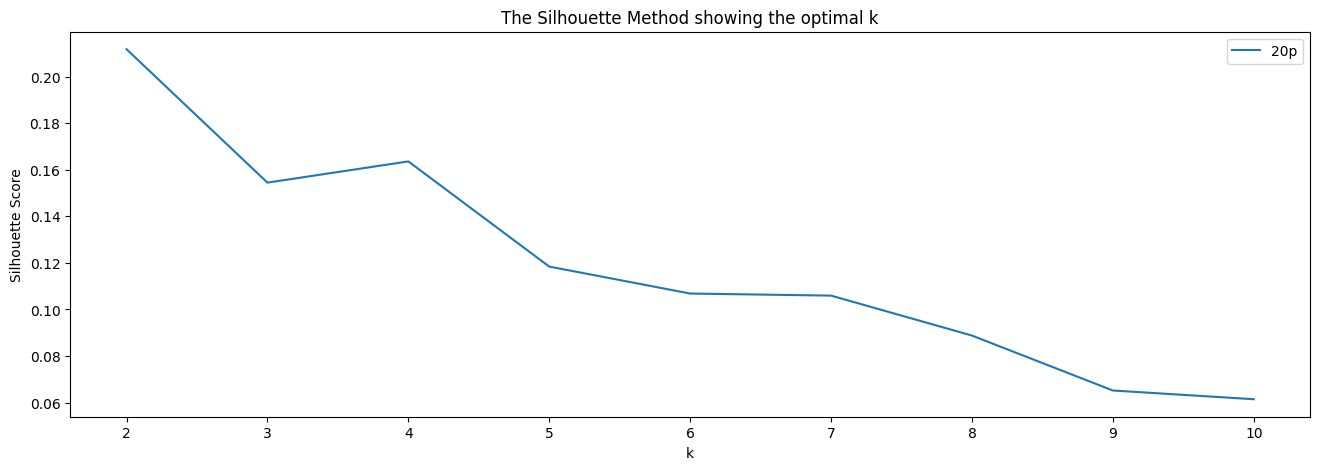

In [40]:
plt.figure(figsize=(16,5))
for key, value in elbow_data.items():
    plt.plot(range(2, num_clusters), value, '-', label=key)
plt.xlabel('k')
plt.ylabel('Sum of square errors (SSE) (distortion)')
plt.title('The Elbow Method showing the optimal k')
plt.legend()

plt.figure(figsize=(16,5))
for key, value in silhouette_data.items():
    plt.plot(range(2, num_clusters), value, '-', label=key)
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('The Silhouette Method showing the optimal k')
plt.legend()
plt.show()

In [41]:
kmean = TimeSeriesKMeans(n_clusters=2,metric="dtw", n_jobs=-1, random_state=42)
labels = kmean.fit_predict(time_series_data)

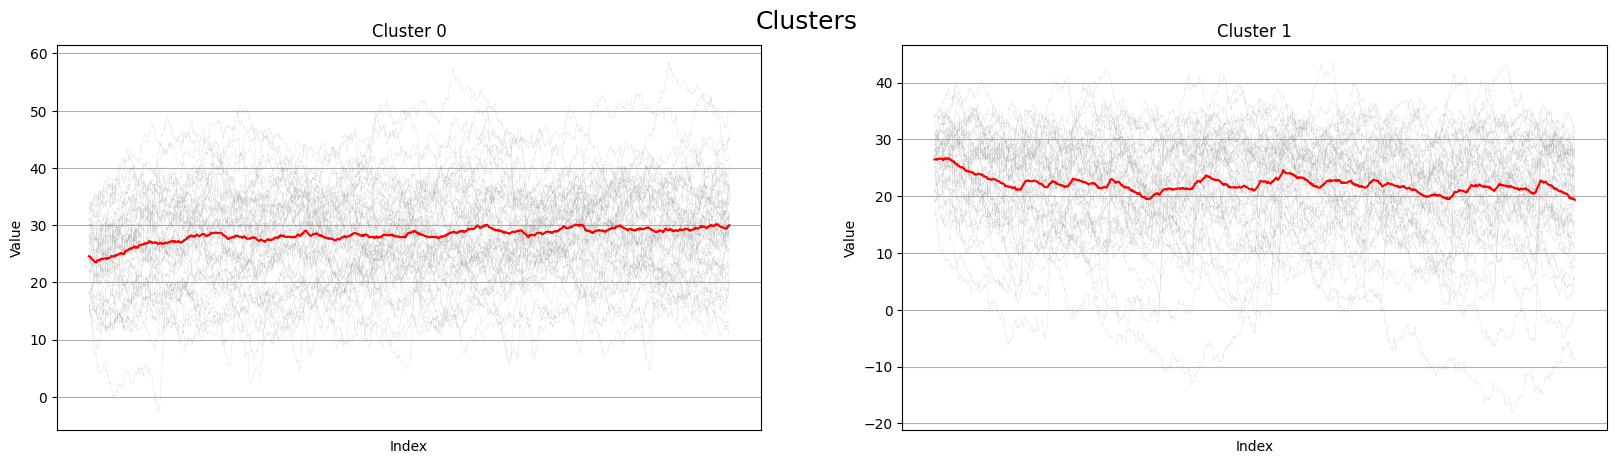

In [42]:
plot_avg_timeseries_clusters(approximation["all"][:training_size].assign(cluster=labels),num_saples=1000, num_clusters=2)

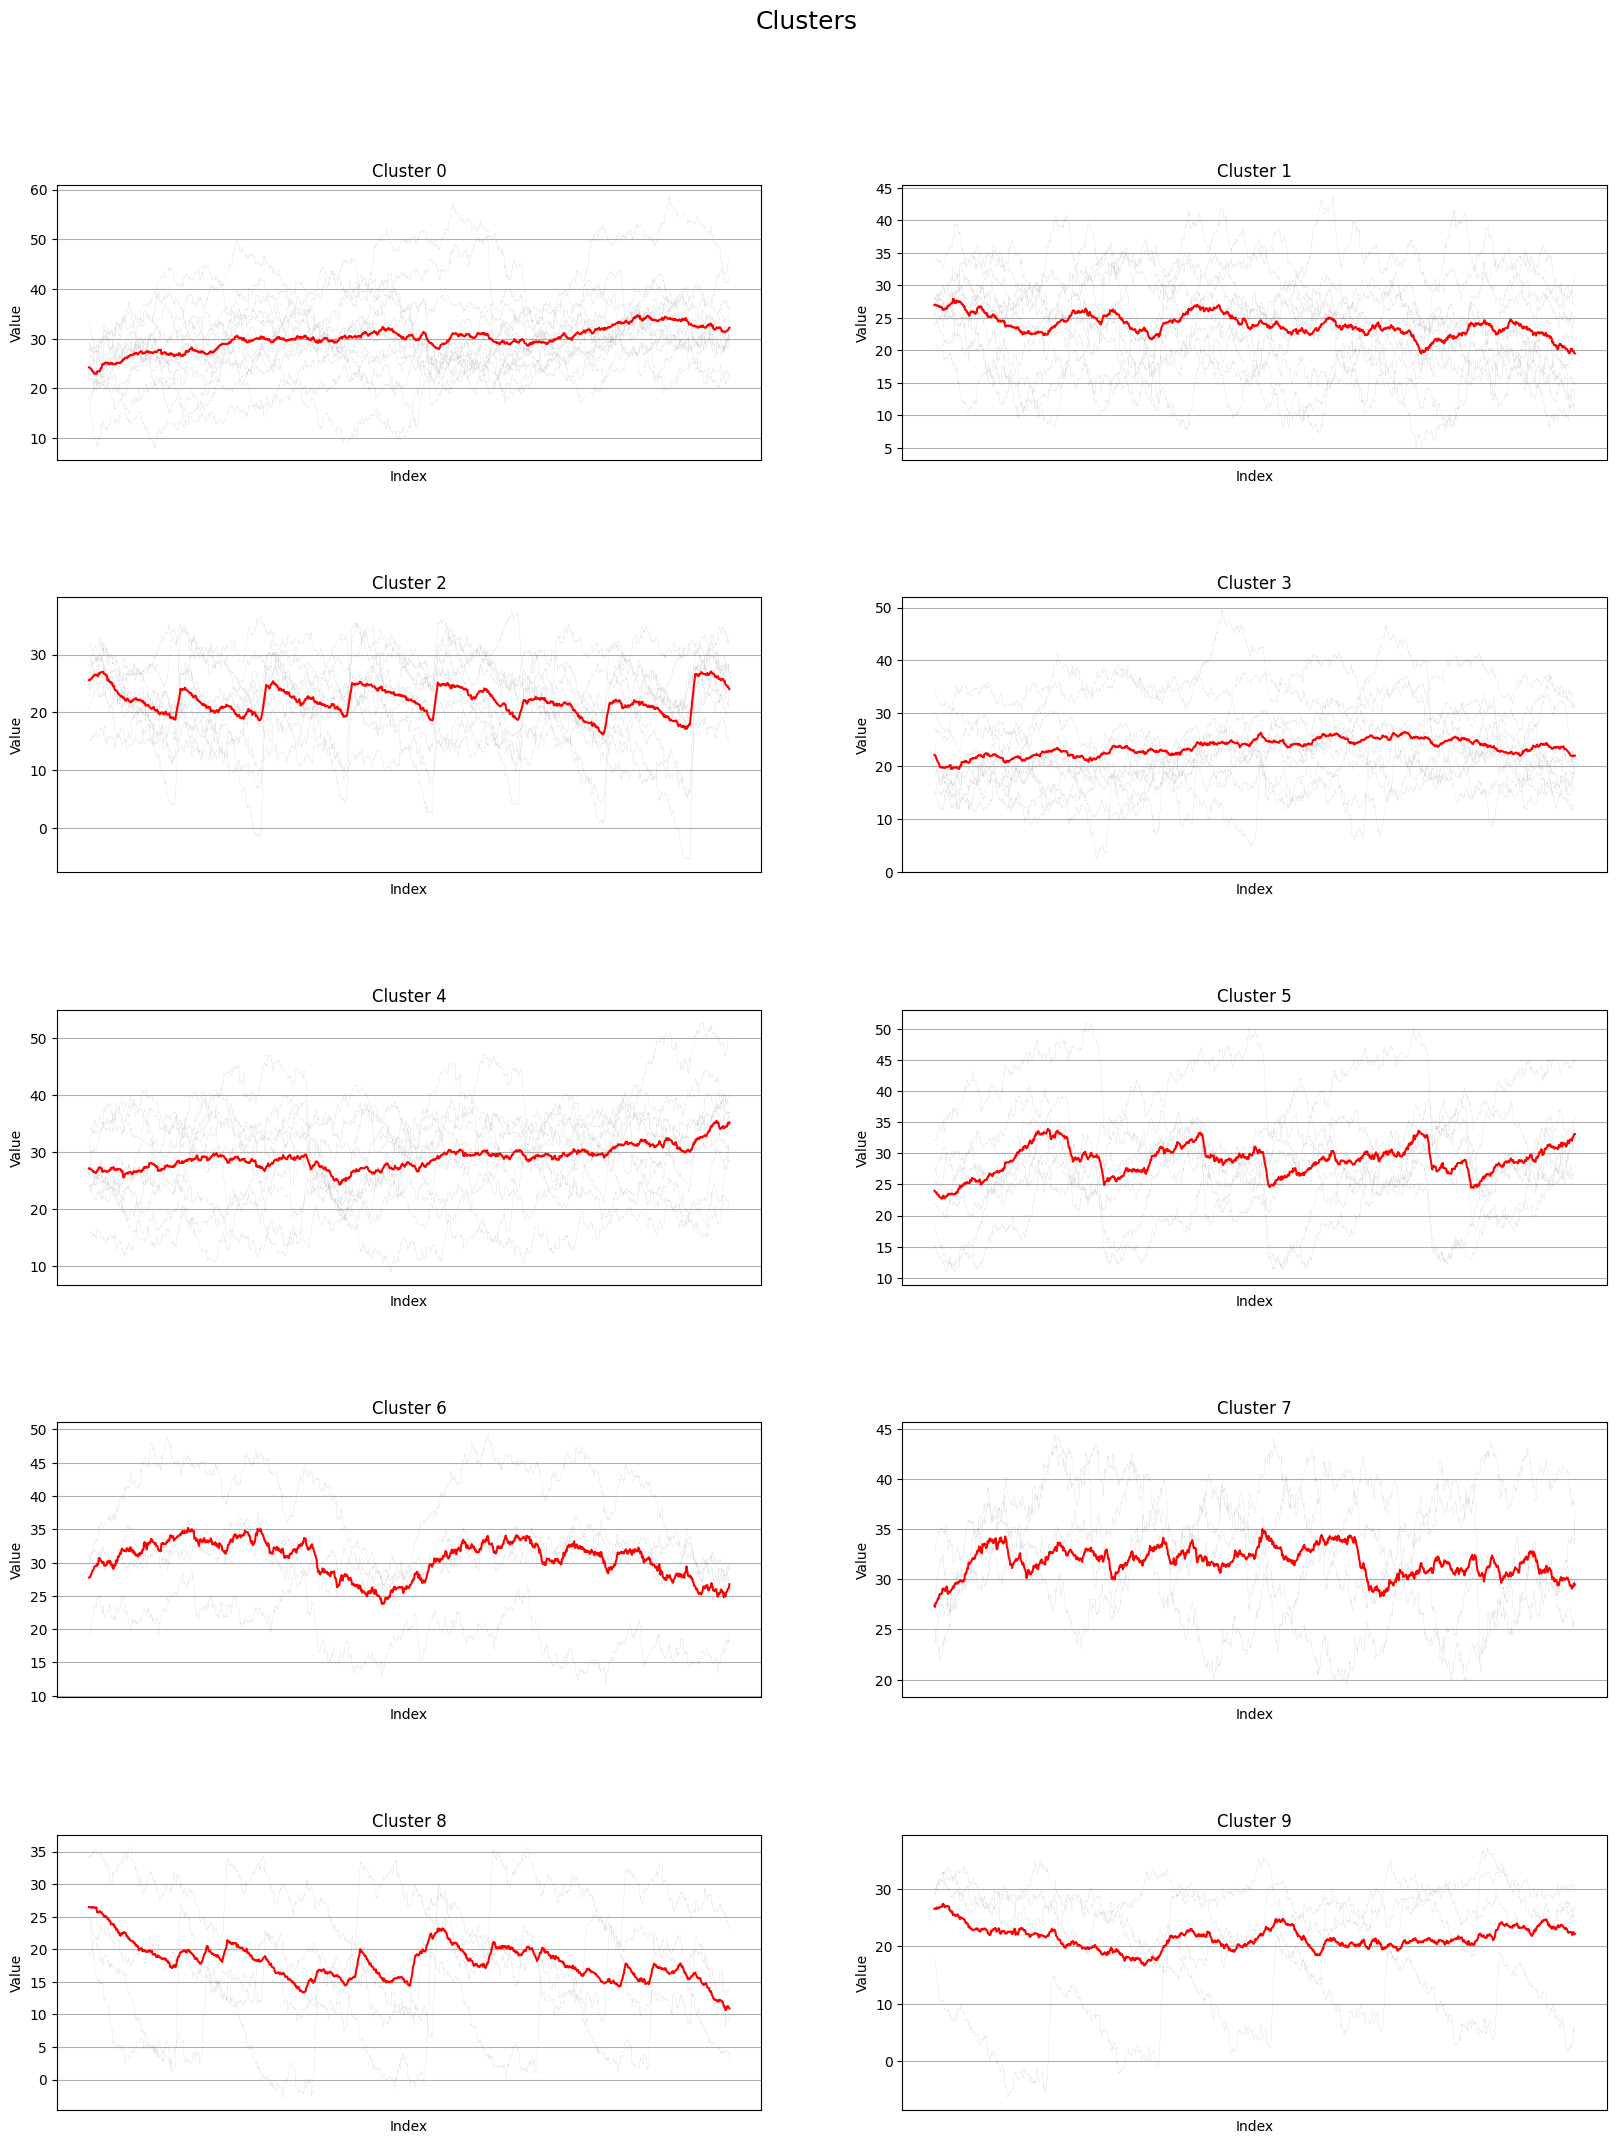

In [45]:
kmean = TimeSeriesKMeans(n_clusters=10,metric="dtw", n_jobs=-1, random_state=42)
labels = kmean.fit_predict(time_series_data)
plot_avg_timeseries_clusters(approximation["all"][:training_size].assign(cluster=labels),num_saples=1000, num_clusters=10)

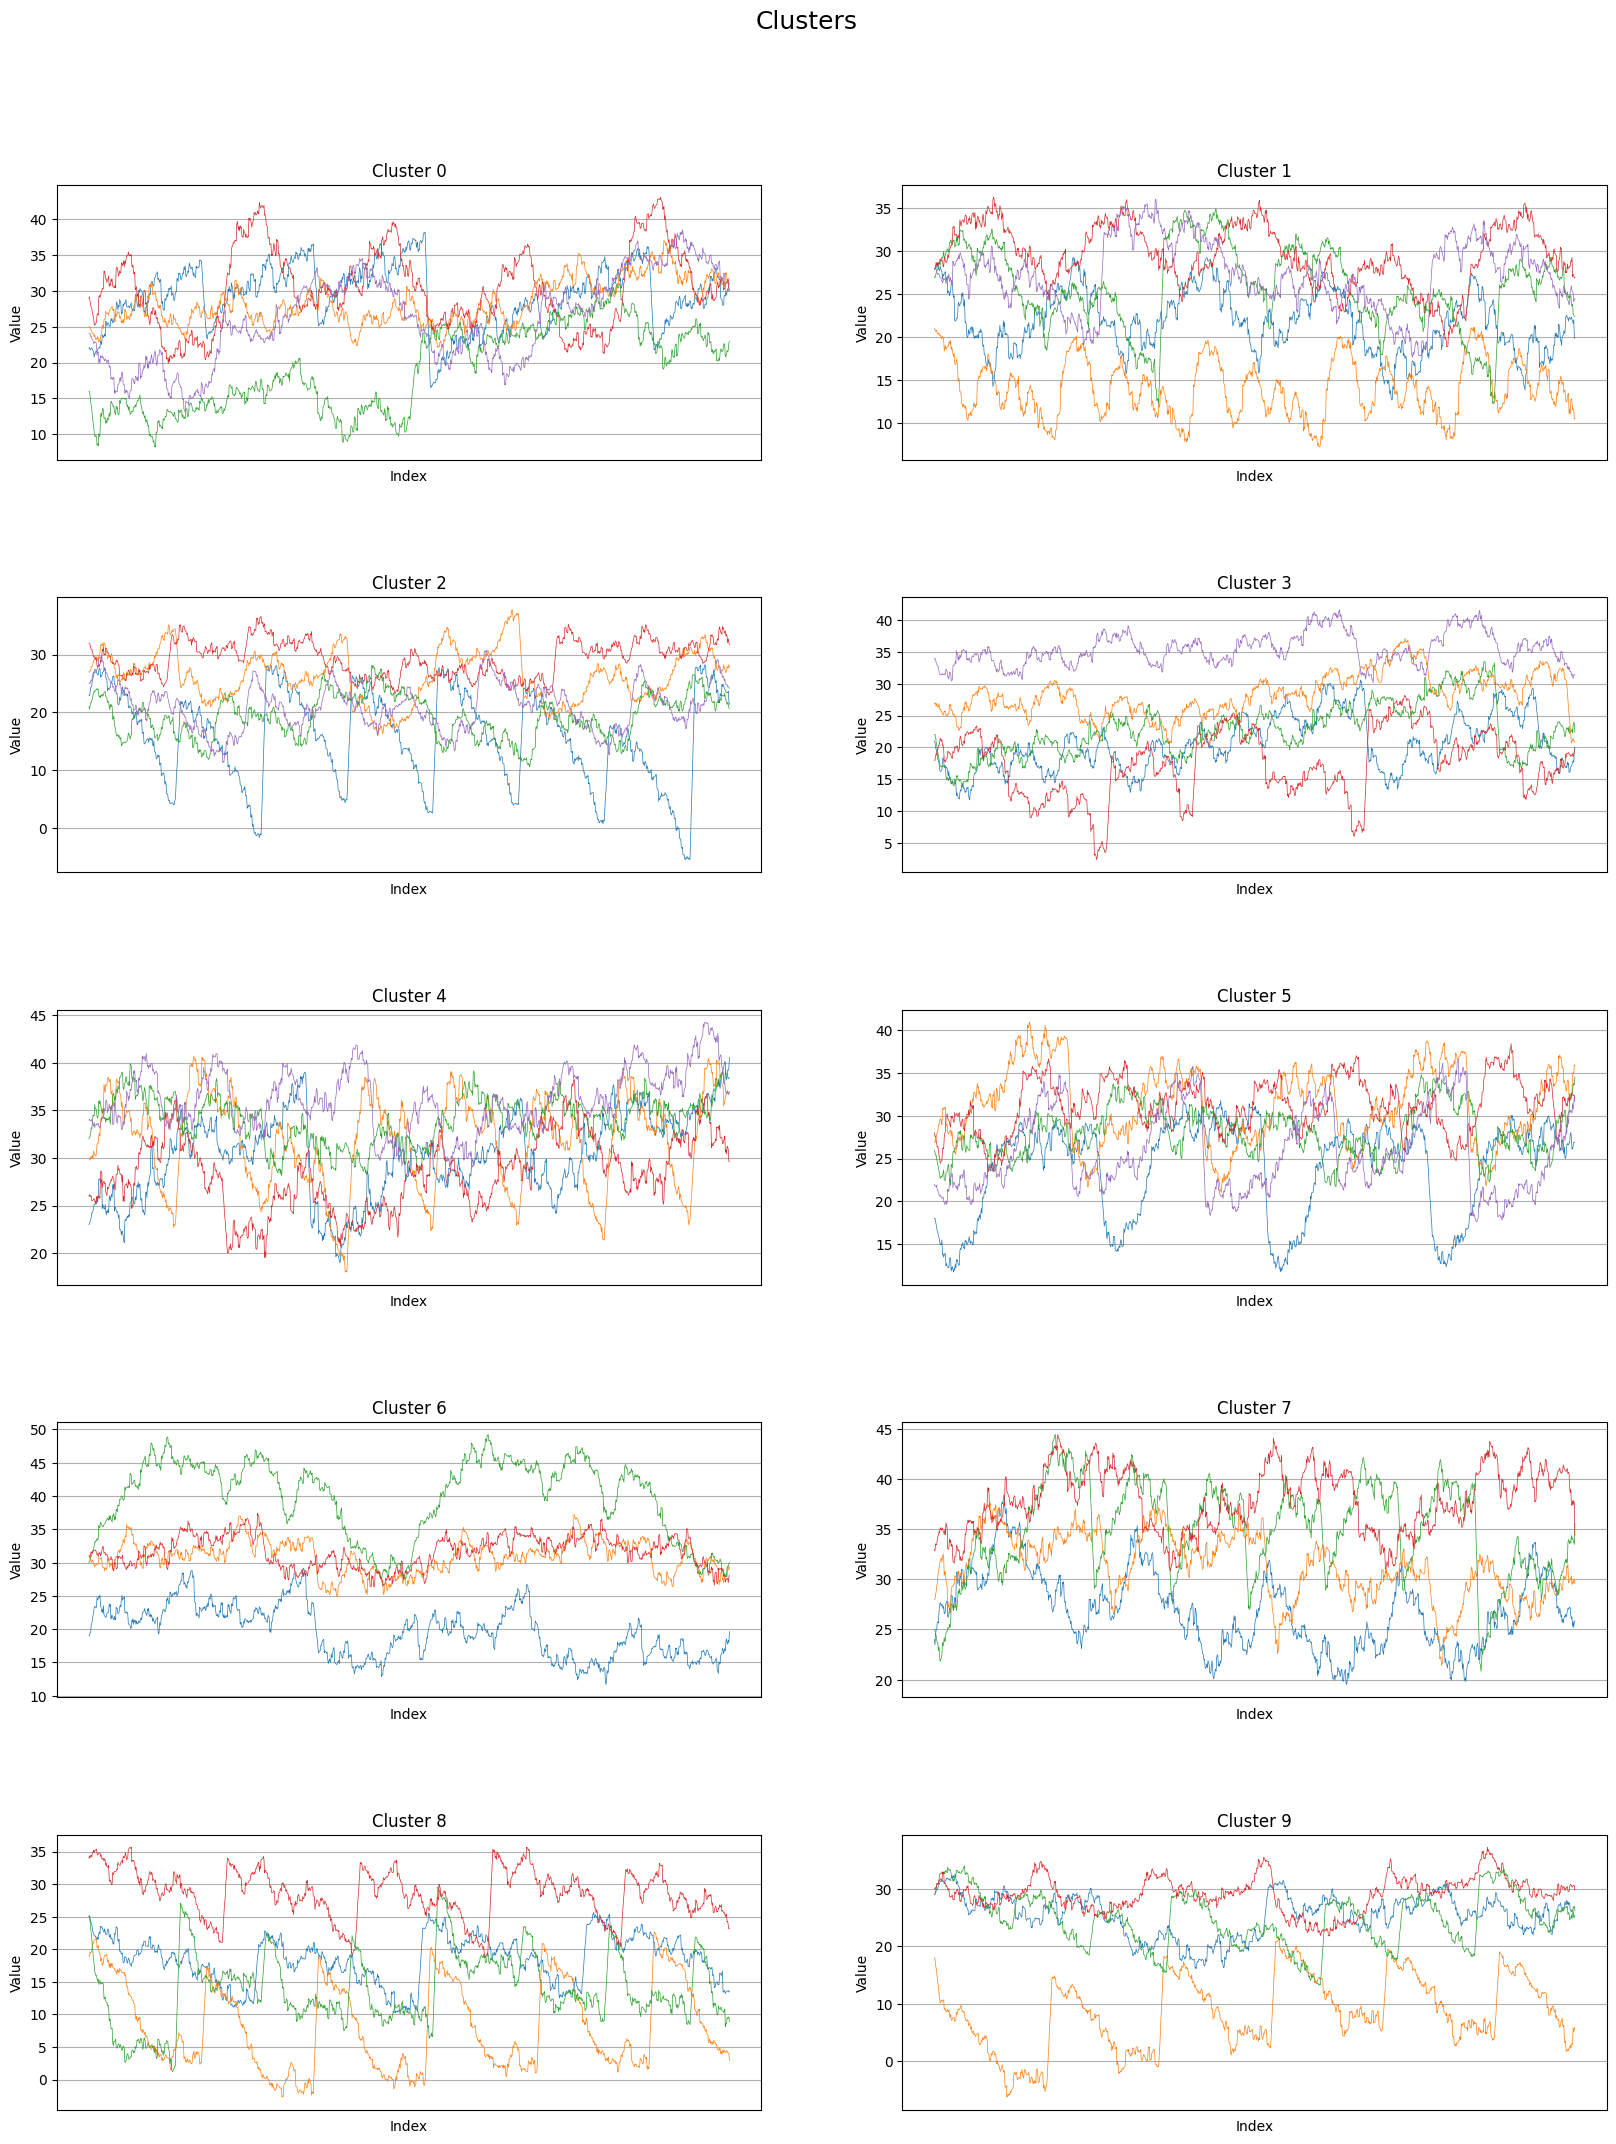

In [46]:
plot_timeseries_clusters(approximation["all"][:training_size].assign(cluster=labels),num_saples=5, num_clusters=10)